## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 14.3 MB/s 


In [ ]:
# Insert your name, your id, course title, assignment id, and due date here as comment 

# Jonathan Jakab : 301917863 
# Jacob Hallum : 302382301 
# Mahdi Noureddine : 219660208 

# Professor Chen
# CSC 180-1 - Intelligent Systems
# Project 3: Computer Vision using GPU and Transfer Learning
# 10/28/2022 10:00AM


## Part I: Position-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
def create_individual():
    return random.sample(range(64), 8)

In [ ]:
print(create_individual())

[43, 59, 4, 37, 15, 54, 44, 10]


In [ ]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[36, 42, 17, 12, 24, 50, 10, 11]


In [ ]:
show_grid(pop[0])

-|-|-|-|-|-|-|-|
----------------
-|-|X|X|X|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

In [ ]:
#fitness function
def evaFitness(individual):
    
    conflict = 0

    for i in range(len(individual)):
      for j in individual[i+1:]: 
        if( (individual[i] % 8) == (j % 8) ):                         #Vertical check
          conflict += 1;
        elif ( individual[i] - (individual[i] % 8) == j - (j % 8) ):  #Horizontal Check
          conflict += 1;
        else:                                                         #Diagonal Check
          distance = abs(j - individual[i])
          verticalOffset = (j % 8) if j >= individual[i] else individual[i] % 8
          verticalDistance = (distance - verticalOffset)//8 + 1
          horizontalDistance = abs( (j % 8) - (individual[i] % 8))
          if(horizontalDistance == verticalDistance):
            conflict += 1; 

    return (checkDuplicate(individual) + conflict,)
    
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):

    dup = 0

    for i in range(len(individual)):
      for j in individual[i+1:]:    
        if individual[i] == j:
          dup += 1;
          break

    return dup

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [ ]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
#Defining Parameters
# n = 50          #number of nevals. (nevals: the number of evalutions for each generation)
# ngen = 10       #number of generations accomplished
# maxsize = 1     #maximum hall of fame size

nList = [100, 500, 1000]      #number of generations/neavels
ngenList = [10, 50, 100]   #number of generations that GA will go through.
                #cxpb: a probability of cross-overing two individuals
                #mutpb: a probability of mutating each individual

def GA(n, ngen):
  pop = toolbox.population(n)
  hof = tools.HallOfFame(maxsize=1)
  pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, 
                                    stats=stats, halloffame=hof, verbose=True)
  return pop, log

results = []
for n in nList:
  for ngen in ngenList:
    pop, log = GA(n, ngen)
    results.append([pop, log, n, ngen])

gen	nevals	avg 	min
0  	100   	9.95	5  
1  	53    	8.75	4  
2  	56    	8.09	4  
3  	60    	7.62	4  
4  	58    	6.84	3  
5  	56    	6.31	3  
6  	66    	6.51	3  
7  	57    	5.44	3  
8  	57    	4.98	3  
9  	62    	4.8 	3  
10 	56    	4.39	3  
gen	nevals	avg 	min
0  	100   	9.81	4  
1  	68    	8.79	4  
2  	66    	8.2 	4  
3  	60    	7.21	3  
4  	51    	5.84	3  
5  	64    	5.95	3  
6  	52    	5.26	3  
7  	68    	5.67	3  
8  	52    	4.72	3  
9  	60    	4.16	3  
10 	52    	3.66	3  
11 	59    	3.71	3  
12 	70    	3.5 	3  
13 	62    	3.24	3  
14 	49    	3.24	3  
15 	59    	3.16	3  
16 	54    	3.25	3  
17 	65    	3.33	3  
18 	63    	3.14	3  
19 	62    	3.13	3  
20 	64    	3.29	3  
21 	60    	3.46	3  
22 	54    	3.35	3  
23 	61    	3.36	3  
24 	58    	3.29	3  
25 	58    	3.28	3  
26 	53    	3.47	3  
27 	57    	3.24	3  
28 	67    	3.31	3  
29 	57    	3.29	3  
30 	65    	3.3 	3  
31 	60    	3.25	3  
32 	56    	3.2 	3  
33 	52    	3.21	3  
34 	68    	3.28	3  
35 	62    	3.21	3  
36 	63    	3.3 	3  


### 5 pts:  Plot the "avg" and "min" for each generation

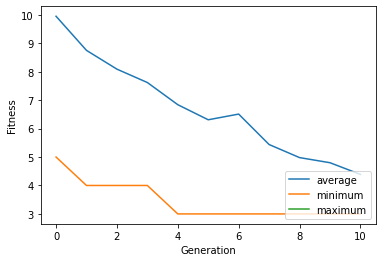

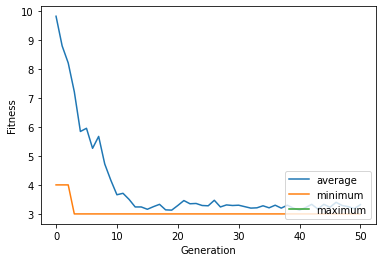

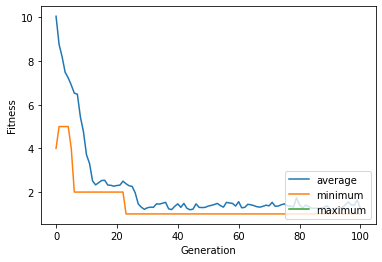

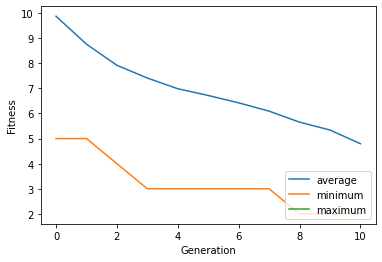

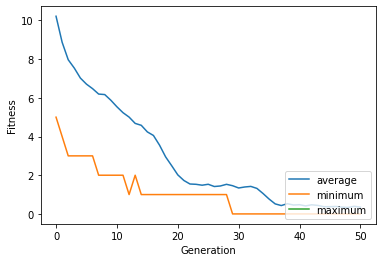

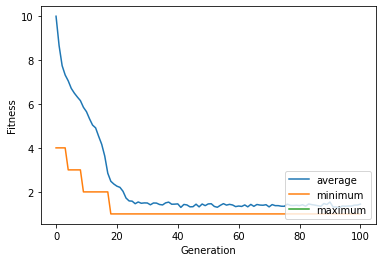

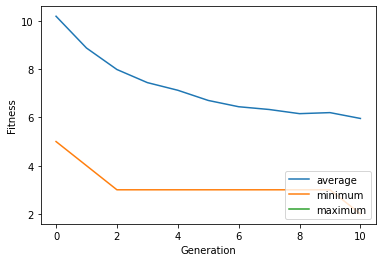

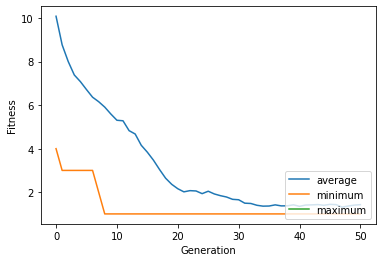

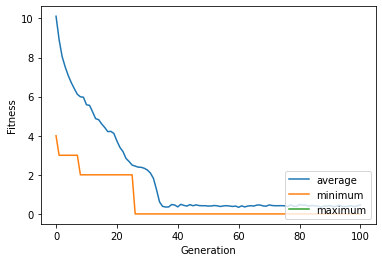

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

def plotResults(log, n, ngen):
  gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

  plt.plot(gen, avg, label="average")
  plt.plot(gen, min_, label="minimum")
  plt.plot(gen, max_, label="maximum")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend(loc="lower right")
  plt.show()

for result in results:
  plotResults(result[1], result[2], result[3])

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
bestIndividual = tools.selBest(pop, k=1)[0]
show_grid(bestIndividual)
print("Fitness Value: ", toolbox.evaluate(bestIndividual))

-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|X|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
Fitness Value:  (0,)


## Part II: Row-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [ ]:
toolbox.individual()

[7, 1, 1, 5, 5, 2, 1, 0]

In [ ]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[1, 6, 0, 6, 5, 0, 5, 7]


In [ ]:
show_grid(pop[0])

-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|X|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [ ]:
#fitness function
def evaFitness(individual):

    conflict = 0

    for row in range(len(individual)):
      for col in range(row + 1, len(individual)):    
        if individual[row] == individual[col]:
          conflict += 1;
        if(abs(individual[row] - individual[col]) == abs(row - col)):
          conflict += 1;

    return (conflict,)

In [ ]:
#Used to test if the results were accurate. Values were provided above.
print(evaFitness([0, 2, 6, 7, 7, 4, 1, 6])) #should return (4,)
print(evaFitness([7, 5, 2, 4, 3, 1, 3, 5])) #should return (6,)
print(evaFitness([3, 1, 6, 0, 5, 7, 2, 1])) #should return (5,)
print(evaFitness([7, 3, 1, 4, 5, 1, 3, 5])) #should return (6,)

(4,)
(6,)
(5,)
(6,)


### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
#Defining Parameters
# n = 50          #number of nevals. (nevals: the number of evalutions for each generation)
# ngen = 10       #number of generations accomplished
# maxsize = 1     #maximum hall of fame size

nList = [100, 500, 1000]      #number of generations/neavels
ngenList = [10, 50, 100]   #number of generations that GA will go through.
                #cxpb: a probability of cross-overing two individuals
                #mutpb: a probability of mutating each individual

def GA(n, ngen):
  pop = toolbox.population(n)
  hof = tools.HallOfFame(maxsize=1)
  pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, 
                                    stats=stats, halloffame=hof, verbose=True)
  return pop, log

results = []
for n in nList:
  for ngen in ngenList:
    pop, log = GA(n, ngen)
    results.append([pop, log, n, ngen])

gen	nevals	avg 	min
0  	100   	7.84	3  
1  	45    	6.21	2  
2  	63    	5.37	2  
3  	53    	4.82	2  
4  	56    	4.36	2  
5  	62    	3.74	2  
6  	70    	3.44	2  
7  	62    	3.09	2  
8  	58    	2.22	2  
9  	58    	2.25	1  
10 	44    	2.2 	1  
gen	nevals	avg 	min
0  	100   	8.23	3  
1  	64    	6.92	3  
2  	58    	5.91	3  
3  	59    	5.3 	2  
4  	55    	5.05	2  
5  	62    	4.47	2  
6  	64    	4.18	2  
7  	57    	3.95	2  
8  	56    	3.65	2  
9  	58    	3.22	2  
10 	68    	3.01	2  
11 	62    	2.92	2  
12 	62    	2.73	2  
13 	55    	2.55	2  
14 	61    	2.59	2  
15 	58    	2.12	2  
16 	55    	2.33	2  
17 	66    	2.41	2  
18 	66    	2.32	2  
19 	64    	2.19	2  
20 	58    	2.33	2  
21 	56    	2.21	2  
22 	56    	2.28	2  
23 	70    	2.25	2  
24 	60    	2.2 	2  
25 	61    	2.43	2  
26 	63    	2.23	2  
27 	57    	2.35	2  
28 	73    	2.18	2  
29 	65    	2.23	2  
30 	59    	2.3 	2  
31 	57    	2.21	2  
32 	51    	2.08	2  
33 	65    	2.14	2  
34 	55    	2.26	2  
35 	58    	2.19	2  
36 	52    	2.2 	2  


### 5 pts:  Plot the "avg" and "min" for each generation

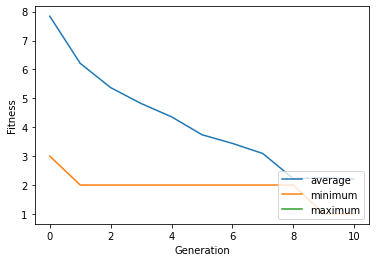

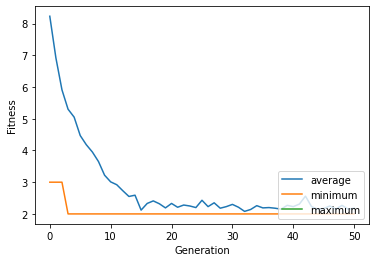

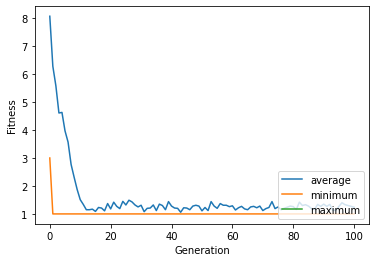

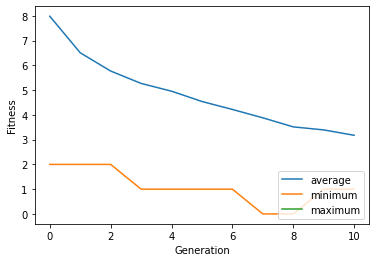

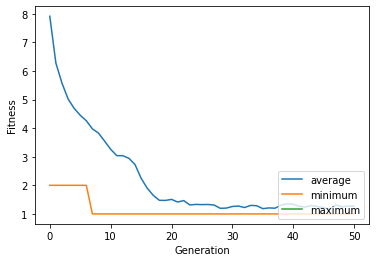

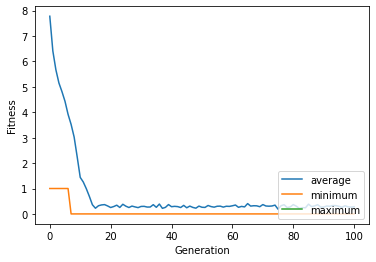

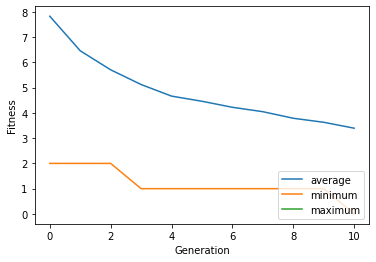

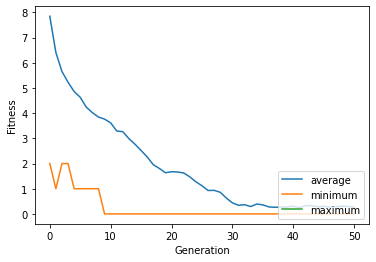

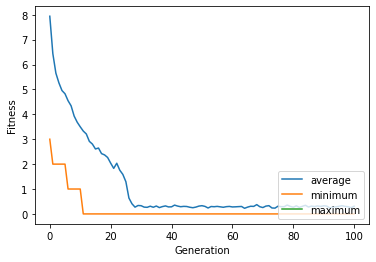

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

def plotResults(log, n, ngen):
  gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

  plt.plot(gen, avg, label="average")
  plt.plot(gen, min_, label="minimum")
  plt.plot(gen, max_, label="maximum")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend(loc="lower right")
  plt.show()

for result in results:
  plotResults(result[1], result[2], result[3])

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
bestIndividual = tools.selBest(pop, k=1)[0]
show_grid(bestIndividual)
print("Fitness Value: ", toolbox.evaluate(bestIndividual))

-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
Fitness Value:  (0,)


### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        